## 7.1 微小图像数据集

### 下载CIFAR-10

In [1]:
from torchvision import datasets
data_path = 'D:/Data/CIFAR10/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

Files already downloaded and verified
Files already downloaded and verified


>  使用train=False,获取一个数据集用于验证数据，并在需要时再次下载该数据集<br> 我们提供给CIFAR10()函数的第1个参数是数据的下载位置；第2个参数指定我们对训练集还是验证集感兴趣；第3个参数表示如果在第1个参数指定的位置找不到数据，我们是否运行PyTorch下载数据

> 数据集子模块为我们提供了对最流行的计算机视觉数据集的预储存访问，如MNIST、Fashion-MNIST、CIFAR-10、XVHN、COCO和Omniglot等。在每种情况下，数据集都作为torch.utils.data.Dataset的子类返回

In [2]:
type(cifar10).__mro__ # 实例cifar10的方法解析顺序中包含了它的父类

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 typing.Generic,
 object)

### Dataset类

> Dataset对象不一定持有数据，但是提供了对其进行统一访问的函数__len__()和__getitem__()，前者返回数据中的项数，后者返回由样本和与之对应的标签（整数索引）组成的项

> 当Python对象配备了__len__()函数是，可以将其作为参数传递给Python的内置函数len()

In [3]:
len(cifar10)

50000

> 由于数据集配备了__getitem__()函数，可以使用标准索引对元组和列表进行索引，以访问单个数据项

In [4]:
img, label = cifar10[99]
img, label

(<PIL.Image.Image image mode=RGB size=32x32 at 0x11A692D9730>, 1)

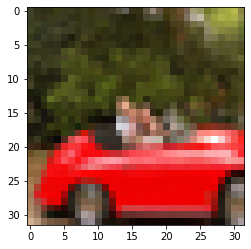

In [5]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

### Dataset变换

> 引入torchvision.transforms模块将PIL图像变换为PyTorch张量，这个模块定义了一组和组合的、类似函数的对象，它可以作为参数传递到TorchVision模块的数据集，诸如datasets.CIFAR10(...)，在数据加载之后，在__getitem__()返回之前对数据进行变换

In [6]:
from torchvision import transforms
dir(transforms)

['AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'autoaugment',
 'functional',
 'functional_pil',
 'functional_tensor',
 'transforms']

> 在这些变换对象中，可以看到ToTensor对象，它将NumPy数组和PIL图像变换为张量，还将输出张量的尺寸设置为$C\times H\times W$(通道、高度、宽度）

In [7]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

> 可以将变换直接作为参数传递给dataset.CIFAR10,此时，访问数据集的元素将返回一个张量，而不是PIL图像

In [8]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
img_t, _ = tensor_cifar10[99]
type(img_t)

torch.Tensor

In [9]:
img_t.shape, img_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [10]:
img_t.min(), img_t.max()

(tensor(0.), tensor(1.))

<function matplotlib.pyplot.show(close=None, block=None)>

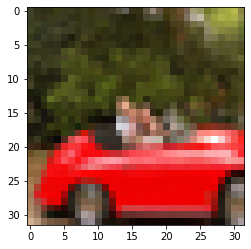

In [11]:
plt.imshow(img_t.permute(1, 2, 0)) # 使用permute将轴的顺序由C*H*W改为H*W*C，因为matplotlib的期望输出是H*W*C
plt.show

### 数据归一化

In [12]:
import torch
# 将数据集返回的所有张量（所有图像）沿着一个额外的维度进行堆叠
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [13]:
imgs.view(3, -1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

> view(3, -1)保留了3个通道（第1个维度，C维度），并将剩余的所有维度合并为一个维度，从而计算出适当的尺寸大小。3*32*32的图像被转换成3*1024的向量，然后对每个通道的1024个元素取平均值

In [14]:
imgs.view(3, -1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

In [15]:
transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

In [16]:
cifar10 = datasets.CIFAR10(data_path,
                           train=True,
                           download=False,
                           transform=transforms.Compose([
                               transforms.ToTensor(), # 如果没有这句在DataLoader的时候会出错
                               transforms.Normalize((0.4914, 0.4822, 0.4465),
                                                    (0.2470, 0.2435, 0.2616))
                           ]))

In [17]:
cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


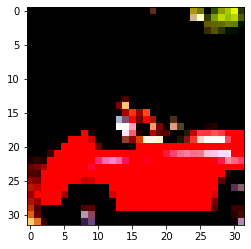

In [18]:
# 此时从数据集绘制的图像不能为我们提供实际图像的真实表示
img_t, _  = cifar10[99]
plt.imshow(img_t.permute(1, 2, 0))
plt.show()

## 7.2 建立模型（区分飞鸟和飞机）

### 构建数据集

In [19]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
         for img, label in cifar10
         if label in [0, 2]]
cifar2_val = [(img, label_map[label])
             for img, label in cifar10_val
             if label in [0, 2]]

### 使用softmax()输出概率

> nn模块将Softmax作为一个可用的模块<br> nn.Softmax()要求我们指定用来编码概率的维度

In [20]:
import torch.nn as nn
softmax = nn.Softmax(dim=1)

# 示例
x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

### 构建全连接模型

In [59]:
# 每个样本有32*32*3个特征
# 构建一个线性模型，有3072个输入特征和一些隐藏特征，接着是一个激活函数，然后另一个线性模型将使网络的输出特征逐渐减少到适当的数量，最后添加一个softmax()函数输出概率
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.Softmax(dim=1))

### 负对数似然（NLL）损失函数

> 我们想要一个损失函数，当概率很低时，损失非常高：低到其他选择都有比它更高的概率。相反，当概率远高于其他选择时，损失应该很低<br> 并不是要真的专注于将概率提高到1，即使此时仍然可以使用MSE使输出概率收敛到[0,1]和[1,0]

> **负对数似然（NLL）**可以作为预测概率的函数，当预测目标类别的概率较低时，NLL会增长到无穷大，二挡预测目标类别概率大于0.5时，NLL的下降速度非常慢，NLL把概率作为输入<br> PyTorch有一个nn.NLLLoss类，没有取概率而是取对数概率张量作为输入，所以将模型输出改为nn.LogSoftmax()

In [43]:
model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))
loss = nn.NLLLoss()

### 训练模型

#### 1.内部循环，批处理样本

> 在一个批处理中评估10000幅图像太多了，所以我们决定进行一个内部循环，每次评估一个样本，然后在单个样本上反向传播<br> 但是基于一个样本的减小损失的好方向对其他样本可能不是好方向。通过在每个迭代周期上变换样本并一次估计几个样本的梯度（为了稳定性更高），我们在梯度下降中有效的引入了随机性

> torch.utils.data模块中有一个DataLoader类，该类有助于打乱数据和组织数据。数据加载器的工作是从数据集中采样小批量，这是我们能够灵活地选择不同的采样策略<br> DataLoader()构造函数至少接收一个数据集对象作为输入，以及batch_size和一个shuffle布尔值，该布尔值指示数据是否需要在每个迭代周期开始被重新打乱<br> DataLoader可以被迭代，因此可以直接在新训练代码的内部循环中使用

In [61]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(nn.Linear(3072, 512),
                      nn.Tanh(),
                      nn.Linear(512, 2),
                      nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.854905
Epoch: 1, Loss: 0.460641
Epoch: 2, Loss: 0.567613
Epoch: 3, Loss: 0.488258
Epoch: 4, Loss: 0.463740
Epoch: 5, Loss: 0.370732
Epoch: 6, Loss: 0.379118
Epoch: 7, Loss: 0.323742
Epoch: 8, Loss: 0.200625
Epoch: 9, Loss: 0.263990
Epoch: 10, Loss: 0.457850
Epoch: 11, Loss: 0.221490
Epoch: 12, Loss: 0.577265
Epoch: 13, Loss: 0.223069
Epoch: 14, Loss: 0.360158
Epoch: 15, Loss: 0.385874
Epoch: 16, Loss: 0.385812
Epoch: 17, Loss: 0.258929
Epoch: 18, Loss: 0.296741
Epoch: 19, Loss: 0.296134
Epoch: 20, Loss: 0.183760
Epoch: 21, Loss: 0.481952
Epoch: 22, Loss: 0.297204
Epoch: 23, Loss: 0.139974
Epoch: 24, Loss: 0.436681
Epoch: 25, Loss: 0.266337
Epoch: 26, Loss: 0.557288
Epoch: 27, Loss: 0.284492
Epoch: 28, Loss: 0.294213
Epoch: 29, Loss: 0.219615
Epoch: 30, Loss: 0.123639
Epoch: 31, Loss: 0.130580
Epoch: 32, Loss: 0.389572
Epoch: 33, Loss: 0.314653
Epoch: 34, Loss: 0.114252
Epoch: 35, Loss: 0.050402
Epoch: 36, Loss: 0.374908
Epoch: 37, Loss: 0.072397
Epoch: 38, Loss: 0.287

#### 2.分类准确率

In [68]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f" % (correct/total))

Accuracy: 0.818500


#### 3.增加神经网络层

In [ ]:
model = nn.Sequential(nn.Linear(3072, 1024),
                      nn.Tanh(),
                      nn.Linear(1024, 512),
                      nn.Tanh(),
                      nn.Linear(512. 128),
                      nn.Tanh(),
                      nn.Linear(128, 2),
                      nn.LogSoftmax(dim=1))

#### 4.交叉熵

> nn.LogSoftmax()和nn.NLLLoss()的组合相当于使用nn.CrossEntropyLoss()<br> **交叉熵**损失函数是PyTorch的一个特性，实际上nn.NLLLoss()计算的是交叉熵，但将对数概率预测作为输入，其中nn.CrossEntropyLoss()用于计算分数（有时称为logits）<br> 从技术上讲，nn.NLLLoss()计算的是把所有质量放在目标上的狄拉克分布和由对数概率输入给出的预测分布之间的交叉熵。在信息论中，按样本大小归一化，这种交叉熵可以解释为预测分布在目标分布下的负对数似然作为结果<br> 因此，当我们的模型预测（Softmax应用）概率时，这2个损失都是给定数据的模型参数的负对数似然

> 从神经网络中丢弃最后一个nn.LogSoftmax()，转而使用nn.CrossEntropyLoss()

In [ ]:
model = nn.Sequential(nn.Linear(3072, 1024),
                      nn.Tanh(),
                      nn.Linear(1024, 512),
                      nn.Tanh(),
                      nn.Linear(512, 128),
                      nn.Tanh(),
                      nn.Linear(128, 2))
loss_fn = nn.CrossEntropyLoss()

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim

train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = nn.Sequential(nn.Linear(3072, 1024),
                      nn.Tanh(),
                      nn.Linear(1024, 512),
                      nn.Tanh(),
                      nn.Linear(512, 128),
                      nn.Tanh(),
                      nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.453518
Epoch: 1, Loss: 0.611415
Epoch: 2, Loss: 0.457055
Epoch: 3, Loss: 0.422298
Epoch: 4, Loss: 0.335312
Epoch: 5, Loss: 0.563283
Epoch: 6, Loss: 0.416869
Epoch: 7, Loss: 0.371373
Epoch: 8, Loss: 0.260455
Epoch: 9, Loss: 0.297829
Epoch: 10, Loss: 0.521220
Epoch: 11, Loss: 0.349487
Epoch: 12, Loss: 0.341801
Epoch: 13, Loss: 0.374785
Epoch: 14, Loss: 0.174531
Epoch: 15, Loss: 0.434190
Epoch: 16, Loss: 0.328784
Epoch: 17, Loss: 0.324447
Epoch: 18, Loss: 0.260563
Epoch: 19, Loss: 0.370787
Epoch: 20, Loss: 0.339474
Epoch: 21, Loss: 0.337969
Epoch: 22, Loss: 0.122827
Epoch: 23, Loss: 0.252425
Epoch: 24, Loss: 0.421682
Epoch: 25, Loss: 0.105909
Epoch: 26, Loss: 0.129121
Epoch: 27, Loss: 0.176902
Epoch: 28, Loss: 0.439743
Epoch: 29, Loss: 0.162713
Epoch: 30, Loss: 0.077676
Epoch: 31, Loss: 0.129421
Epoch: 32, Loss: 0.207449
Epoch: 33, Loss: 0.024648
Epoch: 34, Loss: 0.280303
Epoch: 35, Loss: 0.759306
Epoch: 36, Loss: 0.038348
Epoch: 37, Loss: 0.068329
Epoch: 38, Loss: 0.039

In [71]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=False)
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f" % (correct/total))

Accuracy: 0.801000


> 训练集比测试集的效果要高得多，说明出现了过拟合

#### 5.查看模型参数数量

> PyTorch的nn.Model的parameters()方法提供了一种快速确定模型有多少个参数的方法，该方法与我们向优化器提供参数的方法相同。要找出每个张量实例中有多少个元素，我们可以调用numel()方法，把各分量的元素加起来就得到张量元素的总数

In [73]:
numel_list = [p.numel()
              for p in connected_model.parameters()
              if p.requires_grad == True]
sum(numel_list), numel_list

NameError: name 'connected_model' is not defined